## 第四课 CHatbot的深度学习基础知识

### 主要内容
* 循环神经网络
  * 1.场景与多种应用
  * 2.NLP文字序列最爱的RNN
  * 3.BPTT算法
* LSTM
  * 1.长时依赖问题
  * 2.记忆细胞与状态
* NLP中的应用
  * 1.各式各样的生成模型
  * 2.看图说话基础版与高级版
  * 3.序列到序列学习(机器翻译等)
  

### 循环神经网络与应用
* 模仿论文(连公式、格式都很正确)
* 模仿linux内核代码写程序
* 模仿小四的作品
* 机器翻译
* 看图说话

### 循环神经网络

为什么有了BP神经网络，CNN，还要RNN？
* 传统神经网络(包括CNN)，输入和输出都是互相独立的
* RNN引入记忆的概念，输出依赖于输入和记忆

简单来看，把序列按时间展开

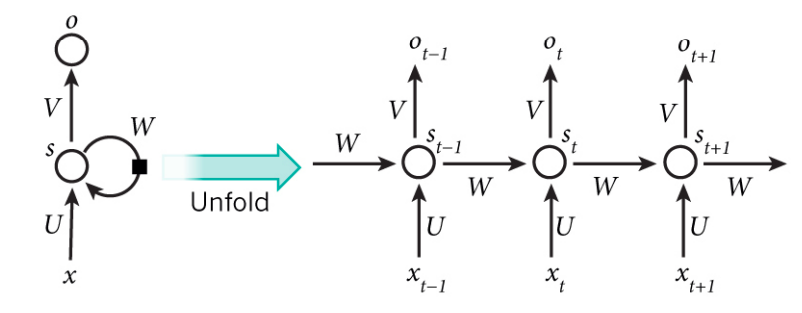

$X_{t}$是时间$t$处的输入
* 可以理解为你在高二的时候遇到了一道数学题

$S_{t}$是时间$t$处的记忆，$S_{t}=f(UX_{t}+WS_{t-1})$,$f$可以是$tanh$等
* 如果你问题一个问题，$S_{t}$会将其与之前的所学到的所有知识$S_{t-1}$一起融合起来对知识进行解答

$O_{t}$是时间$t$的输出，比如是预测下个词的话，可能是$softmax$输出的属于每个候选词的概率，$O_{t}$=$softmax(VS_{t})$
* 为什么$O_{t}$在计算的时候需要$V$参与进来呢？比如你问了一个关于数列的问题，$S_{t}$里面已经囊括了可以解决这个问题的所有知识，与$V$相乘后就只需要把数列相关的知识拿出来进行解答即可

* 可以把隐状态$S_{t}$视作记忆体，捕捉了之前时间点上的信息
* 输出$O_{t}$由当前时间及之前所有的记忆共同计算得到
* 很可惜，实际应用中，$S_{t}$并不能捕捉和保留之前所有的信息(记忆有限，可以理解为人脑容量有限)
* 不同于CNN，这里的**RNN其实整个神经网络都共享一组参数**$(U,V,W)$,极大减小了需要训练和预估的参数量
* 图中的$O_{t}$在有些任务下是不存在的，比如文本情感分析，其实只需要最后的output结果就行
* 这里的$S_{t}$不是代表一个神经元，它是一个向量，比如500*1，就代表500个神经元。每一个输入、输出都是向量和矩阵，表示多维，上图只是它的一个化简版本

$$s_{t}=\tanh \left(U x_{t}+W s_{t-1}\right)$$
$$o_{t}=\operatorname{softmax}\left(V s_{t}\right)$$
$$\begin{array}{l}
x_{t} \in \mathbb{R}^{8000} \\
o_{t} \in \mathbb{R}^{8000} \\
s_{t} \in \mathbb{R}^{100} \\
U \in \mathbb{R}^{100 \times 8000} \\
V \in \mathbb{R}^{8000 \times 100} \\
W \in \mathbb{R}^{100 \times 100}
\end{array}$$

可以看出$x_{t}$输入是一个向量，输出$o_{t}$也是由词组成的概率向量，哪些词出现的概率较高，哪些词就是数处对象

### 不同类型的RNN

* 双向RNN
  * 有些情况下，当前的输出不止依赖于之前的序列元素，还可能依赖之后的序列元素
  * 比如做阅读理解时，从被抠掉的词语中，根据上下文进行填空，这时候纪要考虑前面，又要考虑后边的文章
  * 直观理解：双向RNN叠加

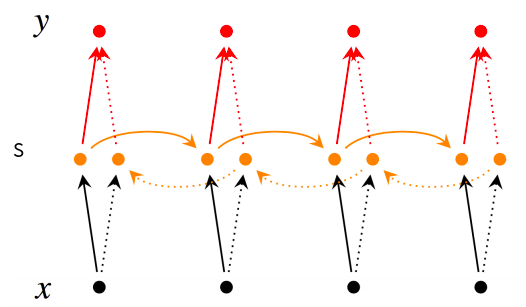

前面的序列元素
$$\vec{S}_{t}=f\left(\vec{W} x_{t}+\vec{V} \vec{S}_{t-1}+\vec{b}\right)$$

后面的序列元素
$$\overleftarrow{S}_{t}=f\left(\bar{W} x_{t}+\overleftarrow{V}^{\leftarrow} S_{t+1}+\bar{b}\right)$$

前后进行拼接
$$y_{t}=g\left(U\left[\vec{S}_{t} ; \stackrel{\leftarrow}{S}_{t}\right]+c\right)$$

但是还存在一些更复杂的双向RNN
* 深层双向RNN
  * 和双向RNN的区别是每一步/每个时间点我们设定多层结构

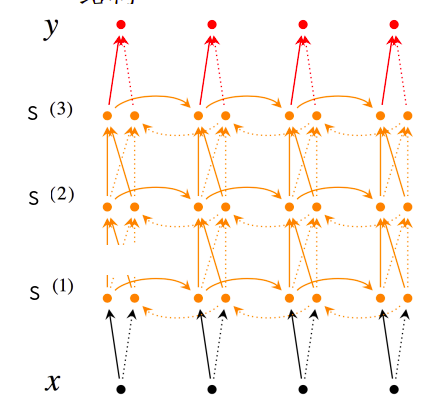

前向元素序列
$$\vec{S}_{t}^{(i)}=f\left(\vec{W}^{(i)} S_{t}^{(i-1)}+\vec{V}^{(i)} \vec{S}_{t-1}^{(i)}+\vec{b}^{(i)}\right)$$

其中$S^{1}$、$S^{2}$、$S^{3}$表示同一时刻的隐藏层，这和上面同一时刻只有一个隐藏层就显得复杂多了。那么我们如何理解这个隐藏层呢？就拿阅读理解来举例子，同一时刻，第一次看是$S^{1}$，第二次看必定是在同一时刻第一次的基础上加上前一时刻第二次看的基础上$\vec{S}_{t}^{(2)}=f\left(\vec{W}^{(2)} S_{t}^{(1)}+\vec{V}^{(2)} \vec{S}_{t-1}^{(2)}+\vec{b}^{(2)}\right)$，这样以此类推，我们这里假设看了三次，那么前向元素就传输了三次，最终得到了$\vec{S}_{t}^{(i)}$,同理，后巷元素也是如此。

后向元素序列
$$\stackrel{\leftarrow}{S_{t}}=f\left(\overleftarrow{W}^{(i)} S_{t}^{(i-1)}+\overleftarrow{V}^{(i)}{S}_{t+1}^{(i)}+\stackrel{\leftarrow}{b}^{(i)}\right)$$

前后进行拼接
$$y_{t}=g\left(U\left[\vec{S}_{t}^{(L)} ; \stackrel{\leftarrow}{S}_{t}^{(L)}\right]+c\right)$$

### RNN与BPTT算法

* MLP(DNN)与CNN用BP算法求偏导
* BPTT和BP是一个思路，只不过和时间$t$有关系



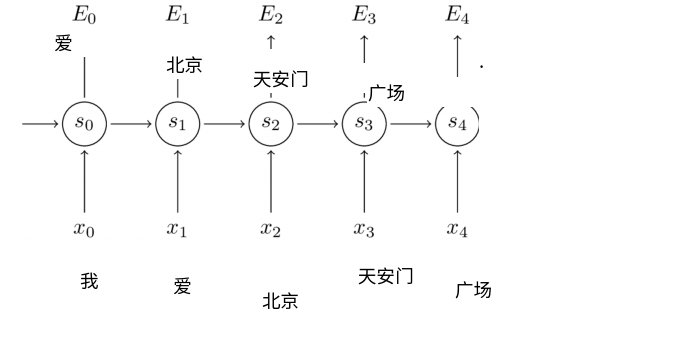

这里我们预测的完整语句是"我爱北京天安门广场"

首先为了使得模型训练的效果更加精确，我们需要对模型设置一个损失函数，这里我们采用交叉熵损失函数来进行训练
$$E_{t}\left(y_{t}, \hat{y}_{t}\right)=-y_{t} \log \hat{y}_{t}$$

损失值是在每个时刻预测的损失值累加之和
$$\begin{aligned}
E(y, \hat{y}) &=\sum_{t} E_{t}\left(y_{t}, \hat{y}_{t}\right) \\
&=-\sum_{t} y_{t} \log \hat{y}_{t}
\end{aligned}$$

我们把预测的结果和实际结果进行计算，得到了最终的损失值，为了使得它能够更好进行训练，精度更加准确，需要对参数进行更新。

不同于反向传播算法(BP),这里我们使用的是BPTT算法进行求导。

首先看下求导公式：
$$\frac{\partial E}{\partial W}=\sum_{t} \frac{\partial E_{t}}{\partial W}$$

假设我们这里要更新$E_{3}$处的参数$W$,根据链式求导法则，我们可以得出如下式子：
$$\frac{\partial E_{3}}{\partial W}=\frac{\partial E_{3}}{\partial \hat{y}_{3}} \frac{\partial \hat{y}_{3}}{\partial s_{3}} \frac{\partial s_{3}}{\partial W}$$

接下来就是BPTT和BP的区别了，一般到这里BP就直接求出公式结束了，但是BPTT因为是与时间$t$相关，沿着时间轴传过来的

$s_{3}$还依赖于$s_{2}$

$$s_{3}=\tanh \left(U x_{t}+W s_{2}\right)$$

因此上面的链式求导还没有结束，
$$\frac{\partial E_{3}}{\partial W}=\sum_{k=0}^{3} \frac{\partial E_{3}}{\partial \hat{y}_{3}} \frac{\partial \hat{y}_{3}}{\partial s_{3}} \frac{\partial s_{3}}{\partial s_{k}} \frac{\partial s_{k}}{\partial W}$$

直到$k=1$，回到第一次传播的地方，所有的计算才结束。


最后我们用一张图来总结$E_{3}$的参数求导过程
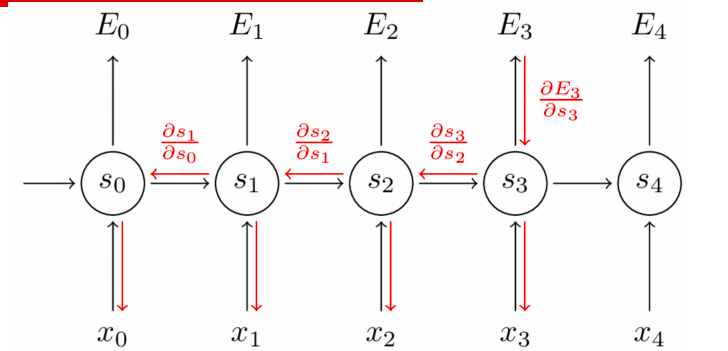

$$\frac{\partial E_{3}}{\partial W}=\sum_{k=0}^{3} \frac{\partial E_{3}}{\partial \hat{y}_{3}} \frac{\partial \hat{y}_{3}}{\partial s_{3}} \frac{\partial s_{3}}{\partial s_{k}} \frac{\partial s_{k}}{\partial W}$$

链式法则

$$\frac{\partial E_{3}}{\partial W}=\sum_{k=0}^{3} \frac{\partial E_{3}}{\partial \hat{y}_{3}} \frac{\partial \hat{y}_{3}}{\partial s_{3}}\left(\prod_{j=k+1}^{3} \frac{\partial s_{j}}{\partial s_{j-1}}\right) \frac{\partial s_{k}}{\partial W}$$

### **看图说话**

* [Microsoft COCO数据集官网](https://cocodataset.org/#download)
* [简单的MS COCO数据集下载方法](https://blog.csdn.net/qq_33000225/article/details/78831102)


In [ ]:
#!sudo apt-get install aria2
!aria2c -c http://msvocds.blob.core.windows.net/annotations-1-0-3/instances_train-val2014.zip 
!aria2c -c http://msvocds.blob.core.windows.net/coco2014/train2014.zip
!aria2c -c http://msvocds.blob.core.windows.net/coco2014/val2014.zip


08/24 04:21:01 [NOTICE] Downloading 1 item(s)
 *** Download Progress Summary as of Mon Aug 24 04:22:02 2020 *** 
=
[#092bd4 1.1GiB/12GiB(9%) CN:1 DL:17MiB ETA:11m5s]
FILE: /content/train2014.zip
-

 *** Download Progress Summary as of Mon Aug 24 04:23:02 2020 *** 
=
[#092bd4 2.1GiB/12GiB(17%) CN:1 DL:17MiB ETA:10m10s]
FILE: /content/train2014.zip
-

 *** Download Progress Summary as of Mon Aug 24 04:24:02 2020 *** 
=
[#092bd4 2.9GiB/12GiB(23%) CN:1 DL:19MiB ETA:8m19s]
FILE: /content/train2014.zip
-

 *** Download Progress Summary as of Mon Aug 24 04:25:02 2020 *** 
=
[#092bd4 3.9GiB/12GiB(31%) CN:1 DL:16MiB ETA:8m40s]
FILE: /content/train2014.zip
-

 *** Download Progress Summary as of Mon Aug 24 04:26:02 2020 *** 
=
[#092bd4 5.1GiB/12GiB(40%) CN:1 DL:17MiB ETA:7m15s]
FILE: /content/train2014.zip
-

 *** Download Progress Summary as of Mon Aug 24 04:27:03 2020 *** 
=
[#092bd4 6.2GiB/12GiB(49%) CN:1 DL:17MiB ETA:6m15s]
FILE: /content/train2014.zip
-

 *** Download Progress Summary as o

#### pytorch实现看图说话

深度学习目前是一个非常活跃的领域---每天都会有许多应用出现。进一步学习Deep Learning最好的方法就是亲自动手。尽可能多的接触项目并且尝试自己去做。这将会帮助你更深刻地掌握各个主题，成为一名更好的Deep Learning实践者。



这篇文章将和大家一起看一个有趣的多模态主题，我们将结合图像和文本处理技术来构建一个有用的深度学习应用，即看图说话(Image Captioning)。看图说话是指从一个图像中基于其中的对象和动作生成文本描述的过程。例如：

![](https://pic1.zhimg.com/80/v2-6872f7f900dce514c66624c1962dc410_720w.jpg)

这种过程在现实生活中有很多潜在的应用场景。一个明显的应用比如保存图片的描述字幕，以便该图片随后可以根据这个描述轻松地被检索出来。

##### 什么是Image Captioning问题？


设想你看到了这张图：

![](https://pic3.zhimg.com/80/v2-448d6727546bde4243f78ed0f0fa3347_720w.jpg)

你首先想到的是什么？下面是一些人们可以想到的句子：





* A man and a girl sit on the ground and eat . （一个男人和一个女孩坐在地上吃东西）

* A man and a little girl are sitting on a sidewalk near a blue bag eating . （一个男人和一个小女孩坐在蓝色包旁边的人行道上吃东西）

* A man wearing a black shirt and a little girl wearing an orange dress share a treat .（一个穿黑色衬衣的男人和一个穿橘色连衣裙的小女孩分享美食） 


快速看一眼就足以让你理解和描述图片中发生的事情。从一个人造系统中自动生成这种文字描述就是Image Captioning的任务。



该任务很明确，即产生的输出是用一句话来描述这幅图片中的内容---存在的对象，属性，正在发生的动作以及对象之间的互动等。但是与其他图像处理问题一样，在人造系统中再现这种行为也是一项艰巨的任务。因此需要使用像Deep Learning这样先进复杂的技术来解决该任务。



在继续下文之前，我想特别感谢Andrej Kartpathy等学者，他们富有洞察力的课程CS231n帮助我理解了这个主题。

##### 解决任务的方法


可以把image captioning任务在逻辑上分为两个模块——一个是基于图像的模型，从图像中提取特征和细微的差别， 另一个是基于语言的模型，将第一个模型给出的特征和对象翻译成自然的语句。



**对于基于图像的模型而言（即编码器）我们通常依靠CNN网络。对于基于语言的模型而言（即解码器），我们依赖RNN网络**。下图总结了前面提到的方法：

![](https://pic3.zhimg.com/80/v2-ccaca7dab99d090a97698532654f8991_720w.jpg)

**通常，一个预先训练好的CNN网络从输入图像中提取特征。特征向量被线性转换成与RNN/LSTM网络的输入具有相同的维度。这个网络被训练作为我们特征向量的语言模型。**



为了训练LSTM模型，我们预先定义了标签和目标文本。比如，如果字幕是A man and a girl sit on the ground and eat .（一个男人和一个女孩坐在地上吃东西），则我们的标签和目标文本如下:

![](https://pic3.zhimg.com/80/v2-dcfa09fc9dd1d2bf3e59a4ee138aeb02_720w.jpg)






这样做是为了让模型理解我们标记序列的开始和结束。

![](https://pic2.zhimg.com/80/v2-694c8294b9f1a05bda0e9dd091629dd9_720w.jpg)

##### 具体实现案例


让我们看一个Pytorch中image captioning的简单实现。我们将以一幅图作为输入，然后使用深度学习模型来预测它的描述。



例子的代码可以在GitHub上找到。代码的原始作者是Yunjey Choi 向他杰出的pytorch例子致敬。



在本例中，一个预先训练好的ResNet-152被用作编码器，而解码器是一个LSTM网络。

![](https://pic2.zhimg.com/80/v2-5676afdb44c7affeccb411ff487cd650_720w.jpg)

要运行本例中的代码，你需要安装必备软件，确保有一个可以工作的python环境，最好使用anaconda。然后运行以下命令来安装其他所需要的库。



In [2]:
!git clone https://github.com/cocodataset/cocoapi

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [3]:
cd cocoapi/PythonAPI/

/content/cocoapi/PythonAPI


In [4]:
!python setup.py build

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/__init__.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/coco.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/cocoeval.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/mask.py -> build/lib.linux-x86_64-3.6/pycocotools
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstac

In [5]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating pycocotools.egg-info
writing pycocotools.egg-info/PKG-INFO
writing dependency_links to pycocotools.egg-info/dependency_links.txt
writing requirements to pycocotools.egg-info/requires.txt
writing top-level names to pycocotools.egg-info/top_level.txt
writing manifest file 'pycocotools.egg-info/SOURCES.txt'
writing manifest file 'pycocotools.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/__init__.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/coco.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/cocoeval.py -> build/bdist.linux-x

In [6]:
cd ../../

/content


In [7]:
!git clone https://github.com/yunjey/pytorch-tutorial

Cloning into 'pytorch-tutorial'...
remote: Enumerating objects: 917, done.
remote: Total 917 (delta 0), reused 0 (delta 0), pack-reused 917
Receiving objects: 100% (917/917), 12.80 MiB | 9.17 MiB/s, done.
Resolving deltas: 100% (490/490), done.


In [8]:
cd pytorch-tutorial/tutorials/03-advanced/image_captioning/

/content/pytorch-tutorial/tutorials/03-advanced/image_captioning


In [9]:
!pip install -r requirements.txt

设置完系统后，就该下载所需的数据集并且训练模型了。这里我们使用的是MS-COCO数据集。可以运行如下命令来自动下载数据集：

In [10]:
!chmod +x download.sh

In [11]:
!./download.sh

流式输出内容被截断，只能显示最后 5000 行内容。
 extracting: ./data/val2014/COCO_val2014_000000279145.jpg  
 extracting: ./data/val2014/COCO_val2014_000000243495.jpg  
 extracting: ./data/val2014/COCO_val2014_000000225791.jpg  
 extracting: ./data/val2014/COCO_val2014_000000428067.jpg  
 extracting: ./data/val2014/COCO_val2014_000000059383.jpg  
 extracting: ./data/val2014/COCO_val2014_000000558498.jpg  
 extracting: ./data/val2014/COCO_val2014_000000376123.jpg  
 extracting: ./data/val2014/COCO_val2014_000000191304.jpg  
 extracting: ./data/val2014/COCO_val2014_000000171062.jpg  
 extracting: ./data/val2014/COCO_val2014_000000014549.jpg  
 extracting: ./data/val2014/COCO_val2014_000000121152.jpg  
 extracting: ./data/val2014/COCO_val2014_000000276596.jpg  
 extracting: ./data/val2014/COCO_val2014_000000029431.jpg  
 extracting: ./data/val2014/COCO_val2014_000000036349.jpg  
 extracting: ./data/val2014/COCO_val2014_000000502055.jpg  
 extracting: ./data/val2014/COCO_val2014_000000438848.jpg  
 extracting: 

现在可以继续并开始模型的构建过程了。首先，你需要处理输入：

In [12]:
# Search for all the possible words in the dataset and
# build a vocabulary list
import nltk
nltk.download('punkt')
!python build_vocab.py

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
loading annotations into memory...
Done (t=2.35s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Tokenized the captions.
[21000/414113] Tokenized the captions.
[

In [13]:
# resize all the images to bring them to shape 224x224
!python resize.py

[100/82783] Resized the images and saved into './data/resized2014/'.
[200/82783] Resized the images and saved into './data/resized2014/'.
[300/82783] Resized the images and saved into './data/resized2014/'.
[400/82783] Resized the images and saved into './data/resized2014/'.
[500/82783] Resized the images and saved into './data/resized2014/'.
[600/82783] Resized the images and saved into './data/resized2014/'.
[700/82783] Resized the images and saved into './data/resized2014/'.
[800/82783] Resized the images and saved into './data/resized2014/'.
[900/82783] Resized the images and saved into './data/resized2014/'.
[1000/82783] Resized the images and saved into './data/resized2014/'.
[1100/82783] Resized the images and saved into './data/resized2014/'.
[1200/82783] Resized the images and saved into './data/resized2014/'.
[1300/82783] Resized the images and saved into './data/resized2014/'.
[1400/82783] Resized the images and saved into './data/resized2014/'.
[1500/82783] Resized the imag

现在，运行下面的命令来训练模型：

In [ ]:
!python train.py --num_epochs 10 --learning_rate 0.01

Namespace(batch_size=128, caption_path='data/annotations/captions_train2014.json', crop_size=224, embed_size=256, hidden_size=512, image_dir='data/resized2014', learning_rate=0.01, log_step=10, model_path='models/', num_epochs=10, num_layers=1, num_workers=2, save_step=1000, vocab_path='data/vocab.pkl')
loading annotations into memory...
Done (t=2.38s)
creating index...
index created!
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth
100% 230M/230M [00:02<00:00, 109MB/s]
Epoch [0/10], Step [0/3236], Loss: 9.2094, Perplexity: 9990.8407
Epoch [0/10], Step [10/3236], Loss: 4.2959, Perplexity: 73.3964
Epoch [0/10], Step [20/3236], Loss: 3.8262, Perplexity: 45.8897
Epoch [0/10], Step [30/3236], Loss: 3.6812, Perplexity: 39.6939
Epoch [0/10], Step [40/3236], Loss: 3.5324, Perplexity: 34.2068
Epoch [0/10], Step [50/3236], Loss: 3.3985, Perplexity: 29.9180
Epoch [0/10], Step [60/3236], Loss: 3.2401, Perplexity

来看一下被封装好的代码中是如何定义模型的，可以在model.py文件中找到：

现在测试我们的模型：

In [ ]:
!python sample.py --image='png/example.png'

对于样例图片，我们的模型给出了这样的输出：

![](https://pic2.zhimg.com/80/v2-5dae4c1433106779a0808629ecae00e8_720w.jpg)

<start> a group of giraffes standing in a grassy area . <end>
<start>一群长颈鹿站在草地上<end>

以上就是如何建立一个用于image captioning的深度学习模型。

### 循环神经网络之LSTM
* 前面提到的RNN解决了对之前的信息保存的问题
* 但是！存在长期依赖的问题
  * 看电影的时候，某些情节的推断需要依赖很久以前的一些细节
  * 很多其他的任务也一样
  * 很可惜随着时间间隔不断增大时，RNN会丧失学习到连接如此远的信息的能力
    * **为什么呢？因为在跟新参数的时候，用到的是链式求导法则，是连乘，在连乘的过程中，如果有导数为0，那么参数就不会更新，丧失了学习的能力**
  * 也就是说，记忆容量有限，一本书从头到尾一字不漏的去记，肯定离得越远的东西忘得越多
  * 这时候，LSTM(长短时记忆网络)就粉墨登场了它使用的是加法


* LSTM是RNN一种，大体结构几乎一样。区别是：
  * 它的记忆细胞改造过
  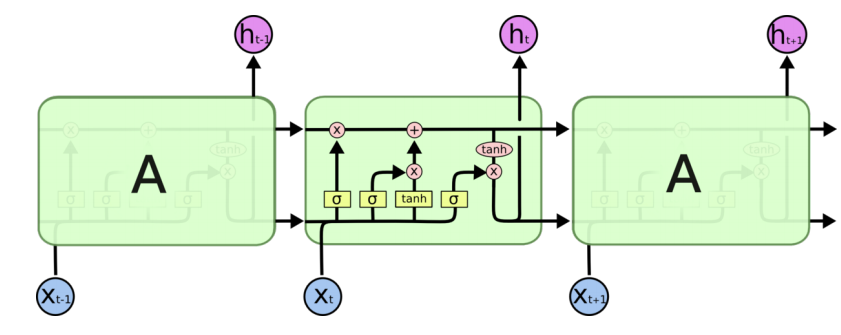
  * 该记的信息会一直传递，不该记的会被门截断(采用加法)

* LSTM关键："细胞状态"
  * 细胞状态类似于传送带。直接在整个链上运行，只有一些少量的线性交互。信息在上面流传保持不变会很容易
  * $C_{t-1}表示上一时刻获取的所有信息$，$C_{t}$表示经过对原有信息的筛检和新信息的获取，最终输出的信息
  * 后面会讲到如何获取的
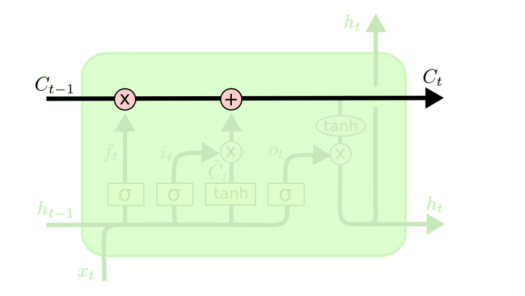

* LSTM如何控制"细胞状态"
  * 通过"门"让信息选择性通过，来去除或者增加信息到细胞状态
  * 包含一个sigmoid神经网络层和一个pointwise乘法操作
  * sigmoid层输出0到1之间的概率，描述每个部分有多少量可以通过。0代表"不许任何量通过"，1就指"允许任意量通过"

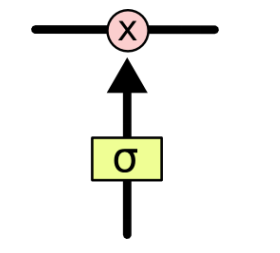

下面我们就来看下具体是如何操作的

* **第一步：决定从"细胞状态"中丢弃什么信息**--->“忘记门”
  * 这一步如何理解？比如你之前180kg，买的是xxxxl的衣服，现在变成了120kg，再买衣服时，之前的信息肯定有部分需要被丢弃

$$f_{t}=\sigma\left(W_{f} \cdot\left[h_{t-1}, x_{t}\right]+b_{f}\right)$$

其中$h_{t-1}$表示上一个时刻的输出，$x_{t}$表示当前的输入，最后外面包裹上$\sigma$控制允许多少之前的旧信息通过，也就是丢弃了一部分信息
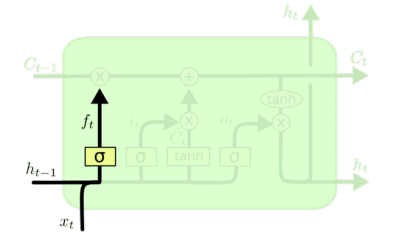

* **第2步：决定放什么新信息到"细胞状态"中**
  * sigmoid层决定什么值需要更新
  * Tanh层创建一个新的候选值向量$\tilde{C}_{t}$
  * 上述2步是为状态更新做准备

  $$\tilde{C}_{t}=\tanh \left(W_{C} \cdot\left[h_{t-1}, x_{t}\right]+b_{C}\right)$$

其中$\tilde{C}_{t}$表示的是我们获取到的所有新知识

$$i_{t}=\sigma\left(W_{i} \cdot\left[h_{t-1}, x_{t}\right]+b_{i}\right)$$

其中$i_{t}$表示从所有获取的新知识中进行筛选，选择出我们用得到的信息
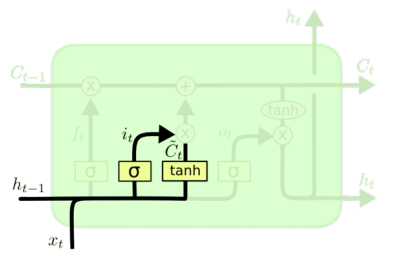

* **第3步：更新"细胞状态"**
  * 把旧状态与$f_{t}$相乘，丢弃掉我们确定需要丢弃的信息
  * 加上$i_{t}$*$\tilde{C}_{t}$.这就是新的候选值，根据我们决定更新每个状态的程度进行变化。
  * 更新$C_{t-1}$为$C_{t}$

$$C_{t}=f_{t} * C_{t-1}+i_{t} * \tilde{C}_{t}$$

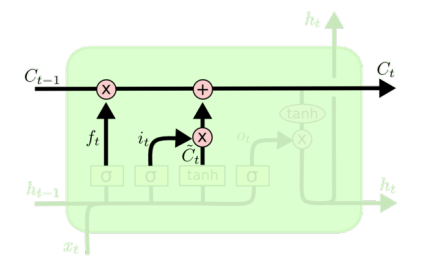

* **第4步：基于"细胞状态"得到输出**
  * 首先运行一个sigmoid层来确定细胞状态的哪个部分将输出
  $$o_{t}=\sigma\left(W_{o}\left[h_{t-1}, x_{t}\right]+b_{o}\right)$$
  * 接着用$tanh$处理细胞状态(得到一个-1~1之间的值)，再将它和sigmoid门的输出相乘，输出我们确定输出的那部分
  * 比如我们可能需要单复数信息来确定输出"他"还是"他们"
  $$h_{t}=o_{t} * \tanh \left(C_{t}\right)$$

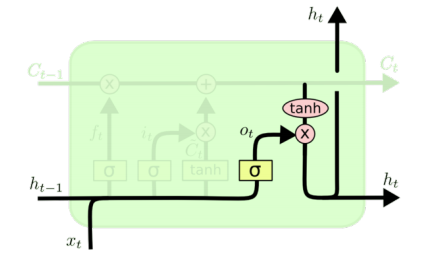

LSTM每个cell(细胞)都是共享权重的

#### GRU

由于LSTM存在一些缺点，比如参数过多，在进行多个筛选的过程中，需要用到不同的参数，因此LSTM还存在一些变体

* Gated Recurrent Unit(GRU),2014年提出
  * 原本LSTM要对旧信息进行筛选，还要生成新的信息在进行筛选，用到了大量的参数。到了GRU，低调了多少信息，只需要补充多少对应的信息即可，这样的话参数量大大减少
  * 将忘记门和输入门合成了一个单一的更新门
  * 同样还混合了细胞状态和隐藏状态，和其他一些改动
  * 比标准LSTM简单
  $$\begin{aligned}
z_{t} &=\sigma\left(W_{z} \cdot\left[h_{t-1}, x_{t}\right]\right) \\
r_{t} &=\sigma\left(W_{r} \cdot\left[h_{t-1}, x_{t}\right]\right) \\
\tilde{h}_{t} &=\tanh \left(W \cdot\left[r_{t} * h_{t-1}, x_{t}\right]\right) \\
h_{t} &=\left(1-z_{t}\right) * h_{t-1}+z_{t} * \tilde{h}_{t}
\end{aligned}$$

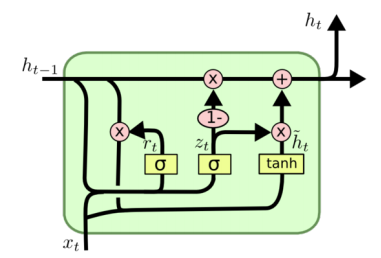

### RNN生成模仿仿照维基百科

* 数据：https://cs.stanford.edu/people/karpathy/char-rnn/wiki.txt
* 代码：https://gist.github.com/karpathy/d4dee566867f8291f086

In [ ]:
"""
Minimal character-level Vanilla RNN model
"""
import numpy as np

data = open('/content/wiki.txt', 'r').read() # should be simple plain text file
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))#data_size表示有多少行，vocab_size表示出现了多少个不同的字符
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

data has 997871 characters, 735 unique.


In [ ]:
def lossFun(inputs, targets, hprev):
  """
  inputs,targets are both list of integers.
  hprev is Hx1 array of initial hidden state
  returns the loss, gradients on model parameters, and last hidden state
  """
  xs, hs, ys, ps = {}, {}, {}, {}
  hs[-1] = np.copy(hprev)
  loss = 0
  # forward pass
  for t in range(len(inputs)):
    xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
    xs[t][inputs[t]] = 1
    hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
    ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
    ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
    loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
  # backward pass: compute gradients going backwards
  dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
  dbh, dby = np.zeros_like(bh), np.zeros_like(by)
  dhnext = np.zeros_like(hs[0])
  for t in reversed(range(len(inputs))):
    dy = np.copy(ps[t])
    dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
    dWhy += np.dot(dy, hs[t].T)
    dby += dy
    dh = np.dot(Why.T, dy) + dhnext # backprop into h
    dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
    dbh += dhraw
    dWxh += np.dot(dhraw, xs[t].T)
    dWhh += np.dot(dhraw, hs[t-1].T)
    dhnext = np.dot(Whh.T, dhraw)
  for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
    np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
  return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

In [ ]:
def sample(h, seed_ix, n):
  """ 
  sample a sequence of integers from the model 
  h is memory state, seed_ix is seed letter for first time step
  """
  x = np.zeros((vocab_size, 1))
  x[seed_ix] = 1
  
  ixes = []
  for t in range(n):
    h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
    y = np.dot(Why, h) + by
    p = np.exp(y) / np.sum(np.exp(y))
    ix = np.random.choice(range(vocab_size), p=p.ravel())
    x = np.zeros((vocab_size, 1))
    x[ix] = 1
    ixes.append(ix)
  return ixes

In [ ]:
# hyperparameters
hidden_size = 100 # size of hidden layer of neurons
seq_length = 25 # number of steps to unroll the RNN for
learning_rate = 1e-1
# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden  
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0

while True:
  # prepare inputs (we're sweeping from left to right in steps seq_length long)
  if p+seq_length+1 >= len(data) or n == 0: 
    hprev = np.zeros((hidden_size,1)) # reset RNN memory
    p = 0 # go from start of data
  inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
  targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

  # sample from the model now and then
  if n % 100 == 0:
    sample_ix = sample(hprev, inputs[0], 200)
    txt = ''.join(ix_to_char[ix] for ix in sample_ix)
    print('----\n %s \n----' % (txt, ))

  # forward seq_length characters through the net and fetch gradient
  loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001
  if n % 100 == 0: print('iter %d, loss: %f' % (n, smooth_loss)) # print progress
  
  # perform parameter update with Adagrad
  for param, dparam, mem in zip([Wxh, Whh, Why, bh, by], 
                                [dWxh, dWhh, dWhy, dbh, dby], 
                                [mWxh, mWhh, mWhy, mbh, mby]):
    mem += dparam * dparam
    param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

  p += seq_length # move data pointer
  n += 1 # iteration counter 

### RNN生成模型写食谱

* 数据集下载：# !wget http://www.ffts.com/recipes/lg/lg32965.zip
* https://gist.github.com/nylki/1efbaa36635956d35bcc
* 代码：https://gist.github.com/karpathy/d4dee566867f8291f086

In [ ]:
"""
Minimal character-level Vanilla RNN model
"""
import numpy as np

data = open('/content/food.txt', 'r').read() # should be simple plain text file
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))#data_size表示有多少行，vocab_size表示出现了多少个不同的字符
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

data has 83574 characters, 85 unique.


In [ ]:
def lossFun(inputs, targets, hprev):
  """
  inputs,targets are both list of integers.
  hprev is Hx1 array of initial hidden state
  returns the loss, gradients on model parameters, and last hidden state
  """
  xs, hs, ys, ps = {}, {}, {}, {}
  hs[-1] = np.copy(hprev)
  loss = 0
  # forward pass
  for t in range(len(inputs)):
    xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
    xs[t][inputs[t]] = 1
    hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
    ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
    ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
    loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
  # backward pass: compute gradients going backwards
  dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
  dbh, dby = np.zeros_like(bh), np.zeros_like(by)
  dhnext = np.zeros_like(hs[0])
  for t in reversed(range(len(inputs))):
    dy = np.copy(ps[t])
    dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
    dWhy += np.dot(dy, hs[t].T)
    dby += dy
    dh = np.dot(Why.T, dy) + dhnext # backprop into h
    dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
    dbh += dhraw
    dWxh += np.dot(dhraw, xs[t].T)
    dWhh += np.dot(dhraw, hs[t-1].T)
    dhnext = np.dot(Whh.T, dhraw)
  for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
    np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
  return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

def sample(h, seed_ix, n):
  """ 
  sample a sequence of integers from the model 
  h is memory state, seed_ix is seed letter for first time step
  """
  x = np.zeros((vocab_size, 1))
  x[seed_ix] = 1
  ixes = []
  for t in range(n):
    h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
    y = np.dot(Why, h) + by
    p = np.exp(y) / np.sum(np.exp(y))
    ix = np.random.choice(range(vocab_size), p=p.ravel())
    x = np.zeros((vocab_size, 1))
    x[ix] = 1
    ixes.append(ix)
  return ixes

In [ ]:
# hyperparameters
hidden_size = 100 # size of hidden layer of neurons
seq_length = 25 # number of steps to unroll the RNN for
learning_rate = 1e-1
# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden  
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0

while True:
  # prepare inputs (we're sweeping from left to right in steps seq_length long)
  if p+seq_length+1 >= len(data) or n == 0: 
    hprev = np.zeros((hidden_size,1)) # reset RNN memory
    p = 0 # go from start of data
  inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
  targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

  # sample from the model now and then
  if n % 100 == 0:
    sample_ix = sample(hprev, inputs[0], 200)
    txt = ''.join(ix_to_char[ix] for ix in sample_ix)
    print('----\n %s \n----' % (txt, ))

  # forward seq_length characters through the net and fetch gradient
  loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001
  if n % 100 == 0: print('iter %d, loss: %f' % (n, smooth_loss)) # print progress
  
  # perform parameter update with Adagrad
  for param, dparam, mem in zip([Wxh, Whh, Why, bh, by], 
                                [dWxh, dWhh, dWhy, dbh, dby], 
                                [mWxh, mWhh, mWhy, mbh, mby]):
    mem += dparam * dparam
    param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

  p += seq_length # move data pointer
  n += 1 # iteration counter 

### 模仿奥巴马演讲
* https://medium.com/@samim/obama-rnn-machine-generated-political-speeches-c8abd18a2ea0#.9sb793kbm

### 注意力模型Attention
* https://zhuanlan.zhihu.com/p/37601161

注意力模型最近几年在深度学习各个领域被广泛使用，无论是图像处理、语音识别还是自然语言处理的各种不同类型的任务中，都很容易遇到注意力模型的身影。所以，了解注意力机制的工作原理对于关注深度学习技术发展的技术人员来说有很大的必要。

#### 人类的视觉注意力

从注意力模型的命名方式看，很明显其借鉴了人类的注意力机制，因此，我们首先简单介绍人类视觉的选择性注意力机制。

![](https://picb.zhimg.com/80/v2-2e36652c48659a36f7fe766b2d3056a3_720w.jpg)



**视觉注意力机制**是人类视觉所特有的大脑信号处理机制。人类视觉通过快速扫描全局图像，获得需要重点关注的目标区域，也就是一般所说的注意力焦点，而后对这一区域投入更多注意力资源，以获取更多所需要关注目标的细节信息，而抑制其他无用信息。

这是人类利用有限的注意力资源从大量信息中快速筛选出高价值信息的手段，是人类在长期进化中形成的一种生存机制，人类视觉注意力机制极大地提高了视觉信息处理的效率与准确性。

上图形象化展示了人类在看到一副图像时是如何高效分配有限的注意力资源的，其中红色区域表明视觉系统更关注的目标，很明显对于上图所示的场景，人们会把注意力更多投入到人的脸部，文本的标题以及文章首句等位置。

深度学习中的注意力机制从本质上讲和人类的选择性视觉注意力机制类似，核心目标也是从众多信息中选择出对当前任务目标更关键的信息。

#### Encoder-Decoder框架

要了解深度学习中的注意力模型，就不得不先谈`Encoder-Decoder`框架，因为目前大多数注意力模型附着在`Encoder-Decoder`框架下，当然，其实注意力模型可以看作一种通用的思想，本身并不依赖于特定框架，这点需要注意。

`Encoder-Decoder`框架可以看作是一种深度学习领域的研究模式，应用场景异常广泛。图2是文本处理领域里常用的`Encoder-Decoder`框架最抽象的一种表示。

![](https://pic4.zhimg.com/80/v2-a5093fc7c0c4942b1d47e7cd2e65ea3b_720w.jpg)

图2 抽象的文本处理领域的Encoder-Decoder框架

文本处理领域的`Encoder-Decoder`框架可以这么直观地去理解：可以把它看作适合处理由一个句子（或篇章）生成另外一个句子（或篇章）的通用处理模型。对于句子对<Source,Target>，我们的目标是给定输入句子Source，期待通过Encoder-Decoder框架来生成目标句子Target。Source和Target可以是同一种语言，也可以是两种不同的语言。而Source和Target分别由各自的单词序列构成：

$$\begin{array}{l}
\text { Source }=\left\langle\mathrm{x}_{1}, \mathrm{x}_{2} \ldots \mathrm{x}_{\mathrm{m}}\right\rangle \\
\text { Target }=\left\langle\mathrm{y}_{1}, \mathrm{y}_{2} \ldots \mathrm{y}_{\mathrm{n}}\right\rangle
\end{array}$$


`Encoder`顾名思义就是对输入句子Source进行编码，将输入句子通过非线性变换转化为中间语义表示C：

$$\mathbf{C}=\mathcal{F}\left(\mathbf{x}_{1}, \mathbf{x}_{2} \ldots \mathbf{x}_{\mathbf{m}}\right)$$


对于解码器`Decoder`来说，其任务是根据句子Source的中间语义表示$C$和之前已经生成的历史信息
$$y_{1}, y_{2} \ldots \ldots y_{i-1}$$

来生成$i$时刻要生成的单词
$$y_{i}=\mathcal{G}\left(\mathbf{C}, \mathbf{y}_{1}, \mathbf{y}_{2} \ldots \mathbf{y}_{i-1}\right)$$


每个$y_{i}$都依次这么产生，那么看起来就是整个系统根据输入句子Source生成了目标句子Target。

如果Source是中文句子，Target是英文句子，那么这就是解决**机器翻译**问题的Encoder-Decoder框架；

如果Source是一篇文章，Target是概括性的几句描述语句，那么这是**文本摘要**的Encoder-Decoder框架；

如果Source是一句问句，Target是一句回答，那么这是**问答系统**或者**对话机器人**的Encoder-Decoder框架。

由此可见，在文本处理领域，Encoder-Decoder的应用领域相当广泛。

`Encoder-Decoder`框架不仅仅在文本领域广泛使用，在语音识别、图像处理等领域也经常使用。

比如对于语音识别来说，图2所示的框架完全适用，区别无非是Encoder部分的输入是语音流，输出是对应的文本信息；而对于“图像描述”任务来说，Encoder部分的输入是一幅图片，Decoder的输出是能够描述图片语义内容的一句描述语。一般而言，**文本处理和语音识别的Encoder部分通常采用RNN模型**，**图像处理的Encoder一般采用CNN模型**。

#### Attention模型

本节先以**机器翻译**作为例子讲解最常见的Soft Attention模型的基本原理，之后抛离Encoder-Decoder框架抽象出了注意力机制的本质思想，然后简单介绍最近广为使用的Self Attention的基本思路。

#### Soft Attention模型

图2中展示的`Encoder-Decoder`框架是没有体现出“注意力模型”的，所以可以把它看作是注意力不集中的分心模型。为什么说它注意力不集中呢？请观察下目标句子Target中每个单词的生成过程如下：
$$\begin{array}{l}
y_{1}=f(C) \\
y_{2}=f\left(C, y_{1}\right) \\
y_{3}=f\left(C, y_{1}, y_{2}\right)
\end{array}$$


其中$f$是`Decoder`的非线性变换函数。从这里可以看出，在生成目标句子的单词时，不论生成哪个单词，它们使用的输入句子Source的语义编码C都是一样的，没有任何区别。

而语义编码C是由句子Source的每个单词经过Encoder编码产生的，这意味着不论是生成哪个单词，$y_{1}$,$y_{2}$还是$y_{3}$，其实句子Source中任意单词对生成某个目标单词$y_{i}$来说影响力都是相同的，这是为何说这个模型没有体现出注意力的缘由。这类似于人类看到眼前的画面，但是眼中却没有注意焦点一样。

如果拿机器翻译来解释这个分心模型的Encoder-Decoder框架更好理解，比如输入的是英文句子：Tom chase Jerry，Encoder-Decoder框架逐步生成中文单词：“汤姆”，“追逐”，“杰瑞”。

在翻译“杰瑞”这个中文单词的时候，分心模型里面的每个英文单词对于翻译目标单词“杰瑞”贡献是相同的，很明显这里不太合理，显然“Jerry”对于翻译成“杰瑞”更重要，但是分心模型是无法体现这一点的，这就是为何说它没有引入注意力的原因。

没有引入注意力的模型在输入句子比较短的时候问题不大，但是如果输入句子比较长，此时所有语义完全通过一个中间语义向量来表示，单词自身的信息已经消失，可想而知会丢失很多细节信息，这也是为何要引入注意力模型的重要原因。

上面的例子中，如果引入Attention模型的话，应该在翻译“杰瑞”的时候，体现出英文单词对于翻译当前中文单词不同的影响程度，比如给出类似下面一个概率分布值：

（Tom,0.3）(Chase,0.2) (Jerry,0.5)

每个英文单词的概率代表了翻译当前单词“杰瑞”时，注意力分配模型分配给不同英文单词的注意力大小。这对于正确翻译目标语单词肯定是有帮助的，因为引入了新的信息。

同理，目标句子中的每个单词都应该学会其对应的源语句子中单词的注意力分配概率信息。这意味着在生成每个单词$y_{i}$的时候，原先都是相同的中间语义表示$C$会被替换成根据当前生成单词而不断变化的$C_{i}$。理解Attention模型的关键就是这里，即由固定的中间语义表示$C$换成了根据当前输出单词来调整成加入注意力模型的变化的$C_{i}$。增加了注意力模型的Encoder-Decoder框架理解起来如图3所示。

![](https://pic2.zhimg.com/80/v2-92302aa42ae10c63627663430ab60f73_720w.jpg)

图3 引入注意力模型的Encoder-Decoder框架



即生成目标句子单词的过程成了下面的形式：
$$\begin{array}{l}
\mathbf{y}_{1}=\mathbf{f} \mathbf{1}\left(\mathbf{C}_{1}\right) \\
\mathbf{y}_{2}=\mathbf{f} \mathbf{1}\left(\mathbf{C}_{2}, \mathbf{y}_{1}\right) \\
\mathbf{y}_{3}=\mathbf{f} \mathbf{1}\left(\mathbf{C}_{3}, \mathbf{y}_{1}, \mathbf{y}_{2}\right)
\end{array}$$





而每个$C_{i}$可能对应着不同的源语句子单词的注意力分配概率分布，比如对于上面的英汉翻译来说，其对应的信息可能如下：
![](https://cdn.mathpix.com/snip/images/exliucX-EGBBcj0-LTSMYRCMeoc6XURLwfdP8VHhhkk.original.fullsize.png)





其中，$f_{2}$函数代表Encoder对输入英文单词的某种变换函数，比如如果Encoder是用的RNN模型的话，这个$f_{2}$函数的结果往往是某个时刻输入$x_{i}$后隐层节点的状态值；

$g$代表Encoder根据单词的中间表示合成整个句子中间语义表示的变换函数，一般的做法中，$g$函数就是对构成元素加权求和，即下列公式：
$$C_{i}=\sum_{j=1}^{L_{x}} a_{i j} h_{j}$$


其中，$L_{x}$代表输入句子Source的长度，$a_{ij}$代表在Target输出第$i$个单词时Source输入句子中第$j$个单词的注意力分配系数，而$h_{j}$则是Source输入句子中第$j$个单词的语义编码。

假设下标$i$就是上面例子所说的“汤姆”，那么$L_{x}$就是3，$h_{1}$=f(“Tom”)，$h_{2}$=f(“Chase”),$h_{3}$=f(“Jerry”)分别是输入句子每个单词的**语义编码**，对应的注意力模型权值则分别是0.6,0.2,0.2，所以$g$函数本质上就是个加权求和函数。如果形象表示的话，翻译中文单词“汤姆”的时候，数学公式对应的中间语义表示$C_{i}$的形成过程类似图4。

![](https://pic3.zhimg.com/80/v2-b89c84193f325482e145911b590faa93_720w.jpg)

图4 Attention的形成过程

这里还有一个问题：生成目标句子某个单词，比如“汤姆”的时候，如何知道Attention模型所需要的输入句子单词注意力分配概率分布值呢？就是说“汤姆”对应的输入句子Source中各个单词的概率分布：(Tom,0.6)(Chase,0.2)
(Jerry,0.2) 是如何得到的呢？

为了便于说明，我们假设对图2的非Attention模型的`Encoder-Decoder`框架进行细化，Encoder采用RNN模型，Decoder也采用RNN模型，这是比较常见的一种模型配置，则图2的框架转换为图5。

![](https://pic3.zhimg.com/80/v2-4b274f8b0c1b6e77fa3f8ab47f7ee126_720w.jpg)

图5 RNN作为具体模型的Encoder-Decoder框架

那么用图6可以较为便捷地说明注意力分配概率分布值的通用计算过程。

![](https://picb.zhimg.com/80/v2-ac1c016e17a1a681a1dd7da0fb18d1e8_720w.jpg)
图6 注意力分配概率计算

对于采用RNN的Decoder来说，在时刻$i$，如果要生成$y_{i}$单词，我们是可以知道Target在生成$y_{i}$之前的时刻$i-1$时，隐层节点$i-1$时刻的输出值$H_{i-1}$的，而我们的目的是要计算生成$y_{i}$时输入句子中的单词“Tom”、“Chase”、“Jerry”对$y_{i}$来说的注意力分配概率分布，那么可以用Target输出句子$i-1$时刻的隐层节点状态$H_{i-1}$去一一和输入句子Source中每个单词对应的RNN隐层节点状态$h_{j}$进行对比，即通过函数$F(h_{j},H+{i-1})$来获得目标单词$y_{i}$和每个输入单词对应的对齐可能性，这个$F$函数在不同论文里可能会采取不同的方法，然后函数$F$的输出经过Softmax进行归一化就得到了符合概率分布取值区间的注意力分配概率分布数值。

绝大多数Attention模型都是采取上述的计算框架来计算注意力分配概率分布信息，区别只是在$F$的定义上可能有所不同。图7可视化地展示了在英语-德语翻译系统中加入Attention机制后，Source和Target两个句子每个单词对应的注意力分配概率分布。
![](https://picb.zhimg.com/80/v2-cfa6cd2cd4a855d165b16ad0f51cee90_720w.jpg)
图7 英语-德语翻译的注意力概率分布

上述内容就是经典的Soft Attention模型的基本思想，那么怎么理解Attention模型的物理含义呢？一般在自然语言处理应用里会把Attention模型看作是输出Target句子中某个单词和输入Source句子每个单词的对齐模型，这是非常有道理的。

目标句子生成的每个单词对应输入句子单词的概率分布可以理解为输入句子单词和这个目标生成单词的对齐概率，这在机器翻译语境下是非常直观的：传统的统计机器翻译一般在做的过程中会专门有一个短语对齐的步骤，而注意力模型其实起的是相同的作用。

![](https://pic4.zhimg.com/80/v2-b2e651923277337fb4413c0e93ac8d55_720w.jpg)
图8 Google 神经网络机器翻译系统结构图

图8所示即为Google于2016年部署到线上的基于神经网络的机器翻译系统，相对传统模型翻译效果有大幅提升，翻译错误率降低了60%，其架构就是上文所述的加上Attention机制的Encoder-Decoder框架，主要区别无非是其Encoder和Decoder使用了8层叠加的LSTM模型。



### Attention机制的本质思想

如果把Attention机制从上文讲述例子中的Encoder-Decoder框架中剥离，并进一步做抽象，可以更容易看懂Attention机制的本质思想。
![](https://pic1.zhimg.com/80/v2-24927f5c33083c1322bc16fa9feb38fd_720w.jpg)

图9 Attention机制的本质思想

我们可以这样来看待Attention机制：将Source中的构成元素想象成是由一系列的<Key,Value>数据对构成，此时给定Target中的某个元素Query，通过计算Query和各个Key的相似性或者相关性，得到每个Key对应Value的权重系数，然后对Value进行加权求和，即得到了最终的Attention数值。所以本质上Attention机制是对Source中元素的Value值进行加权求和，而Query和Key用来计算对应Value的权重系数。即可以将其本质思想改写为如下公式：

Attention(Query, Source) $=\sum_{i=1}^{L_{x}}$ Similarity(Query,Key $\left._{i}\right) *$ Value$_{i}$


其中，$L_{x}$=||Source||代表Source的长度，公式含义即如上所述。

上文所举的机器翻译的例子里，因为在计算Attention的过程中，Source中的Key和Value合二为一，指向的是同一个东西，也即输入句子中每个单词对应的语义编码，所以可能不容易看出这种能够体现本质思想的结构。

当然，**从概念上理解，把Attention仍然理解为从大量信息中有选择地筛选出少量重要信息并聚焦到这些重要信息上，忽略大多不重要的信息，这种思路仍然成立**。

聚焦的过程体现在权重系数的计算上，权重越大越聚焦于其对应的Value值上，即权重代表了信息的重要性，而Value是其对应的信息。

从图9可以引出另外一种理解，也可以将Attention机制看作一种软寻址（Soft Addressing）:Source可以看作存储器内存储的内容，元素由地址Key和值Value组成，当前有个Key=Query的查询，目的是取出存储器中对应的Value值，即Attention数值。通过Query和存储器内元素Key的地址进行相似性比较来寻址，之所以说是软寻址，指的不像一般寻址只从存储内容里面找出一条内容，而是可能从每个Key地址都会取出内容，取出内容的重要性根据Query和Key的相似性来决定，之后对Value进行加权求和，这样就可以取出最终的Value值，也即Attention值。所以不少研究人员将Attention机制看作软寻址的一种特例，这也是非常有道理的。

至于Attention机制的具体计算过程，如果对目前大多数方法进行抽象的话，可以将其归纳为两个过程：
* 第一个过程是根据Query和Key计算权重系数
* 第二个过程根据权重系数对Value进行加权求和。

而第一个过程又可以细分为两个阶段：
* 第一个阶段根据Query和Key计算两者的相似性或者相关性；* 第二个阶段对第一阶段的原始分值进行归一化处理；

这样，可以将Attention的计算过程抽象为如图10展示的三个阶段。
![](https://pic2.zhimg.com/80/v2-07c4c02a9bdecb23d9664992f142eaa5_720w.jpg)

图10 三阶段计算Attention过程

在第一个阶段，可以引入不同的函数和计算机制，根据Query和某个$Key_i$，计算两者的相似性或者相关性，最常见的方法包括：求两者的向量点积、求两者的向量Cosine相似性或者通过再引入额外的神经网络来求值，即如下方式：

点积: $\quad$ Similarity(Query, $\left.K e y_{i}\right)=$ Query $\cdot K e y_{i}$

Cosine相似性：Similarity (Query, $\left.K e y_{i}\right)=\frac{\text { Query } \cdot K e y_{i}}{\|Q u e r y\| \cdot\left\|K e y_{i}\right\|}$

MLP网络：Similarity(Query, $\left.\operatorname{Key}_{i}\right)=$ MLP(Query, $\operatorname{Key}_{i}$ )



第一阶段产生的分值根据具体产生的方法不同其数值取值范围也不一样

第二阶段引入类似SoftMax的计算方式对第一阶段的得分进行数值转换，一方面可以进行归一化，将原始计算分值整理成所有元素权重之和为1的概率分布；另一方面也可以通过SoftMax的内在机制更加突出重要元素的权重。即一般采用如下公式计算：
$$a_{i}=\operatorname{Softmax}\left(\operatorname{Sim}_{i}\right)=\frac{e^{\sin _{i}}}{\sum_{j=1}^{L_{x}} e^{\sin j}}$$



第二阶段的计算结果$a_i$即为$value_i$对应的权重系数，然后进行加权求和即可得到Attention数值：
![](https://pic1.zhimg.com/80/v2-3dcf9d0ea703db3045d9a60d2e7eadb2_720w.jpg)


通过如上三个阶段的计算，即可求出针对Query的Attention数值，目前绝大多数具体的注意力机制计算方法都符合上述的三阶段抽象计算过程。





### Self Attention模型

通过上述对Attention本质思想的梳理，我们可以更容易理解本节介绍的Self Attention模型。

Self Attention也经常被称为intra Attention（内部Attention），最近一年也获得了比较广泛的使用，比如Google最新的机器翻译模型内部大量采用了Self Attention模型。

在一般任务的Encoder-Decoder框架中，输入Source和输出Target内容是不一样的，比如对于英-中机器翻译来说，Source是英文句子，Target是对应的翻译出的中文句子，Attention机制发生在Target的元素Query和Source中的所有元素之间。

而Self-Attention顾名思义，指的不是Target和Source之间的Attention机制，而是Source内部元素之间或者Target内部元素之间发生的Attention机制，也可以理解为Target=Source这种特殊情况下的注意力计算机制。其具体计算过程是一样的，只是计算对象发生了变化而已，所以此处不再赘述其计算过程细节。

如果是常规的Target不等于Source情形下的注意力计算，其物理含义正如上文所讲，比如对于机器翻译来说，本质上是目标语单词和源语单词之间的一种单词对齐机制。

那么如果是Self-Attention机制，一个很自然的问题是：通过Self-Attention到底学到了哪些规律或者抽取出了哪些特征呢？或者说引入Self-Attention有什么增益或者好处呢？

我们仍然以机器翻译中的Self-Attention来说明，图11和图12是可视化地表示Self-Attention在同一个英语句子内单词间产生的联系。
![](https://pic1.zhimg.com/80/v2-1b7a38bc0bd8a46b52753ece64f665ad_720w.jpg)

图11 可视化Self Attention实例

![](https://pic4.zhimg.com/80/v2-c19809fef8cd32115ad69d6946ec6564_720w.jpg)
图12 可视化Self Attention实例

从两张图（图11、图12）可以看出，Self-Attention可以捕获同一个句子中单词之间的一些**句法特征**（比如图11展示的有一定距离的短语结构）或者**语义特征**（比如图12展示的its的指代对象Law）。

很明显，**引入Self-Attention后会更容易捕获句子中长距离的相互依赖的特征**，因为如果是RNN或者LSTM，需要依次序序列计算，对于远距离的相互依赖的特征，要经过若干时间步步骤的信息累积才能将两者联系起来，而距离越远，有效捕获的可能性越小。

但是Self-Attention在计算过程中会直接将句子中任意两个单词的联系通过一个计算步骤直接联系起来，所以远距离依赖特征之间的距离被极大缩短，有利于有效地利用这些特征。除此外，Self-Attention对于增加计算的并行性也有直接帮助作用。这是为何Self-Attention逐渐被广泛使用的主要原因。





### Attention机制的应用

前文有述，Attention机制在深度学习的各种应用领域都有广泛的使用场景。上文在介绍过程中我们主要以自然语言处理中的机器翻译任务作为例子，下面分别再从图像处理领域和语音识别选择典型应用实例来对其应用做简单说明。

![](https://pic1.zhimg.com/80/v2-19e1f44cc6b0d1f97b022cd1281cf350_720w.jpg)


图13 图片-描述任务的Encoder-Decoder框架

图片描述（Image-Caption）是一种典型的图文结合的深度学习应用，输入一张图片，人工智能系统输出一句描述句子，语义等价地描述图片所示内容。很明显这种应用场景也可以使用Encoder-Decoder框架来解决任务目标，此时Encoder输入部分是一张图片，一般会用**CNN**来对图片进行特征抽取，Decoder部分使用**RNN**或者*LSTM**来输出自然语言句子（参考图13）。

此时如果加入Attention机制能够明显改善系统输出效果，Attention模型在这里起到了类似人类视觉选择性注意的机制，在输出某个实体单词的时候会将注意力焦点聚焦在图片中相应的区域上。图14给出了根据给定图片生成句子“A
person is standing on a beach with a surfboard.”过程时每个单词对应图片中的注意力聚焦区域。
![](https://pic4.zhimg.com/80/v2-3a652b0dd6fd983cdca6d6ddc3f12212_720w.jpg)

图14 图片生成句子中每个单词时的注意力聚焦区域

图15给出了另外四个例子形象地展示了这种过程，每个例子上方左侧是输入的原图，下方句子是人工智能系统自动产生的描述语句，上方右侧图展示了当AI系统产生语句中划横线单词的时候，对应图片中聚焦的位置区域。比如当输出单词dog的时候，AI系统会将注意力更多地分配给图片中小狗对应的位置。
![](https://pic3.zhimg.com/80/v2-515b0f7b340d65e709fbf41dcc949ab3_720w.jpg)

图15 图像描述任务中Attention机制的聚焦作用
![](https://picb.zhimg.com/80/v2-de056a44b848c63c40ea466696115855_720w.jpg)

图16 语音识别中音频序列和输出字符之间的Attention

语音识别的任务目标是将语音流信号转换成文字，所以也是Encoder-Decoder的典型应用场景。Encoder部分的Source输入是语音流信号，Decoder部分输出语音对应的字符串流。

图16可视化地展示了在Encoder-Decoder框架中加入Attention机制后，当用户用语音说句子
how much would a woodchuck chuck
时，输入部分的声音特征信号和输出字符之间的注意力分配概率分布情况，颜色越深代表分配到的注意力概率越高。从图中可以看出，在这个场景下，Attention机制起到了将输出字符和输入语音信号进行对齐的功能。

上述内容仅仅选取了不同AI领域的几个典型Attention机制应用实例，Encoder-Decoder加Attention架构由于其卓越的实际效果，目前在深度学习领域里得到了广泛的使用，了解并熟练使用这一架构对于解决实际问题会有极大帮助。



#### 参考文献
* https://zhuanlan.zhihu.com/p/37601161